## PROJECT -  VISUALIZING EARNINGS BASED ON COLLEGE MAJORS

The Dataset used in this project contains information on the job outcomes of students who graduated from college between 2010 and 2010.

The project will focus on using visualizations to explore information such as:
1. Do students in more popular majors make more money?

2. How many majors are predominantly male? Predominantly female?

3. Which category of majors have the most students

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Creating and Exploring DataFrame

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

The dataframe contains 173 rows and 21 columns of which 5 are floats. 14 are integers and 2 are string objects

In [3]:
recent_grads.iloc[1]

Rank                                                 2
Major_code                                        2416
Major                   MINING AND MINERAL ENGINEERING
Total                                              756
Men                                                679
Women                                               77
Major_category                             Engineering
ShareWomen                                    0.101852
Sample_size                                          7
Employed                                           640
Full_time                                          556
Part_time                                          170
Full_time_year_round                               388
Unemployed                                          85
Unemployment_rate                             0.117241
Median                                           75000
P25th                                            55000
P75th                                            90000
College_jo

In [4]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
recent_grads.head(3)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [6]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


### Remove Missing Values
Matplotlib expects that columns have matching lengths, thus missing values will cause matplotlib to throw an error.

In [7]:
#Number of rows before removing missing values
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [8]:
recent_grads = recent_grads.dropna(axis = 0)

In [9]:
#Number of rows after removing missing values
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

There was only one row with missing values

### Using Scatter Plots to explore relationships

#### Scatter plot of Sample Size and Median

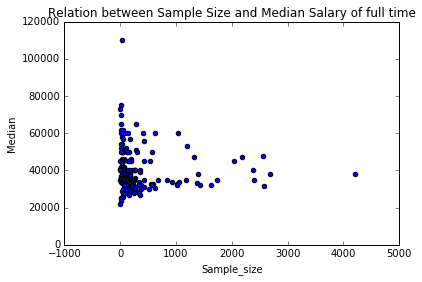

In [10]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter',\
                 title = 'Relation between Sample Size and Median Salary of full time')

#### Scatter Plot of Sample size and Unemployment Rate

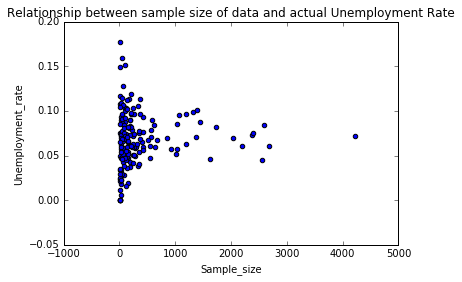

In [11]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate',\
                 kind = 'scatter', title = 'Relationship between sample size of data and actual Unemployment Rate')

#### Scatter Plot of Fulltime Employees and Median Salary

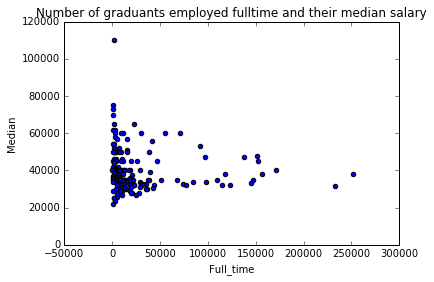

In [12]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter',\
                 title = 'Number of graduants employed fulltime and their median salary')

#### Scatter plot of Share of women in a major and Unemployment Rate for that Major

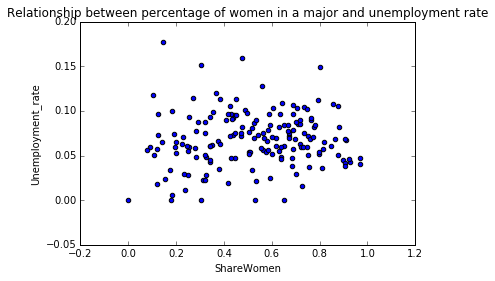

In [13]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',\
                  kind='scatter',
                  title='Relationship between percentage of women in a major and unemployment rate')

There is little correlation between this relationship. The unemployment rate seems even across all majors with different percentage of women that graduated from the major

#### Scatter Plot for Percentage of Men graduated from a major and median salary for that Major

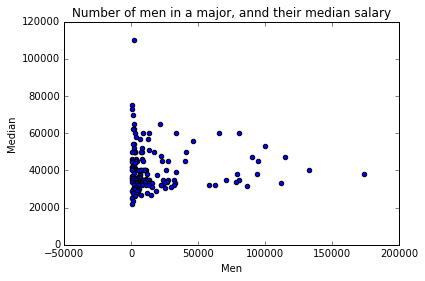

In [14]:
recent_grads.plot(x='Men',y='Median', kind='scatter', title='Number of men in a major, annd their median salary')

#### Scatter Plot for Percentage of Women in a major and median salary for that major

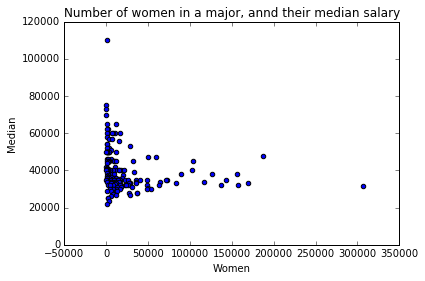

In [15]:
recent_grads.plot(x='Women',y='Median', kind='scatter', title='Number of women in a major, annd their median salary')

#### Using axes object to plot scatter plot of the above

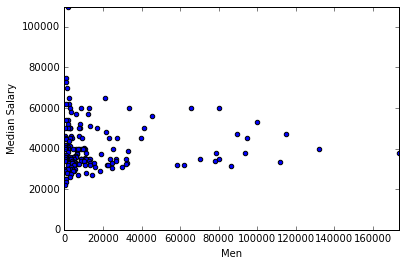

In [16]:
fig, ax  = plt.subplots()
ax.scatter(recent_grads[['Men']],recent_grads[['Median']])
ax.set_xlabel('Men')
ax.set_ylabel('Median Salary')
ax.set_xlim(0,recent_grads['Men'].max())
ax.set_ylim(0,recent_grads['Median'].max())
plt.show()

#### Using axes object to plot scatter plot of the above

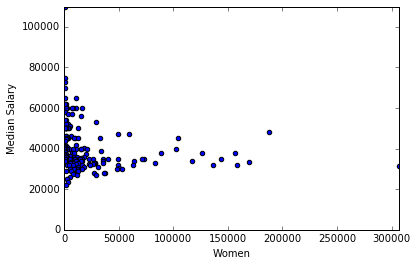

In [17]:
fig, ax  = plt.subplots()
ax.scatter(recent_grads[['Women']],recent_grads[['Median']])
ax.set_xlabel('Women')
ax.set_ylabel('Median Salary')
ax.set_xlim(0,recent_grads['Women'].max())
ax.set_ylim(0,recent_grads['Median'].max())
plt.show()

### Using Histograms to get distribution of values

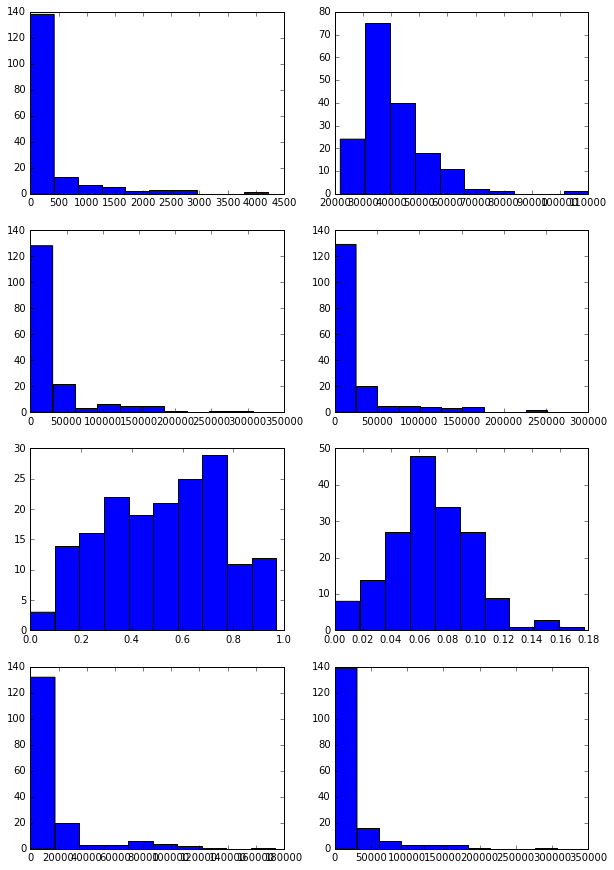

In [18]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen',\
       'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize = (10,15))
for i in range(0,8):
    ax = fig.add_subplot(4,2,i+1)
    ax.hist(recent_grads[cols[i]])

### Using Scatter Matrix Plot

In [19]:
from pandas.plotting import scatter_matrix

#### Create A Scatter Matrix plot for Sample size and Median
Create a 2 by 2 Scatter Matrix plot for Sample size and Median columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24e2e6bc18>,
      dtype=object)

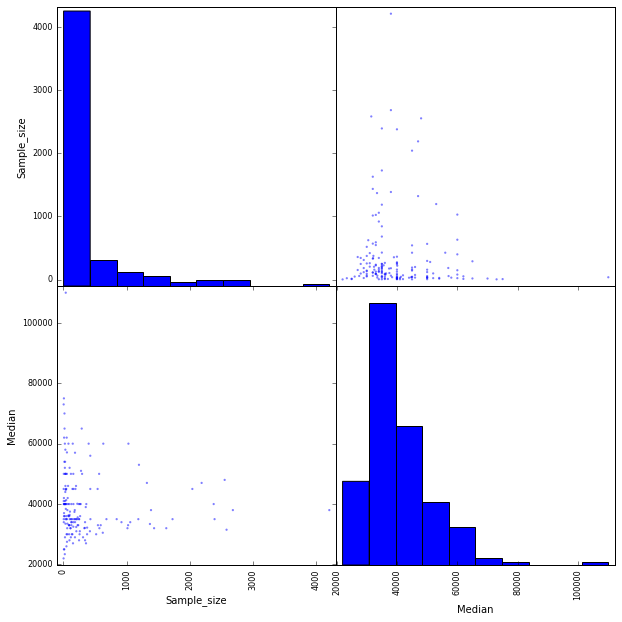

In [21]:
scatter_matrix(recent_grads[['Sample_size','Median']],\
              figsize = (10,10))

#### Creating Scatter Matrix plot for Sample size, Median and Unemployment Rates

Create a 3 by 3 scatter matrix plot for the above columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24e296a588>,
      dtype=object)

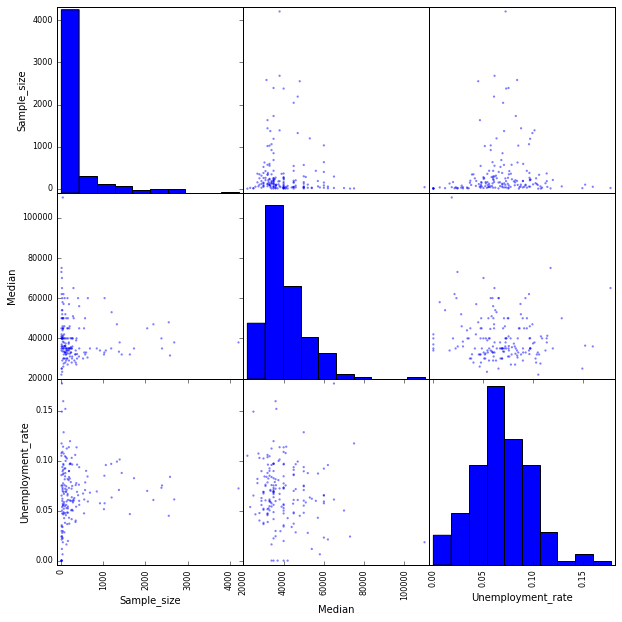

In [22]:
scatter_matrix(recent_grads[['Sample_size', 'Median',\
                            'Unemployment_rate']], figsize=(10,10))

### BAR PLOTS

 Using bar plots to compare percentages of women from the first 10 rows and last ten rown of dataframe

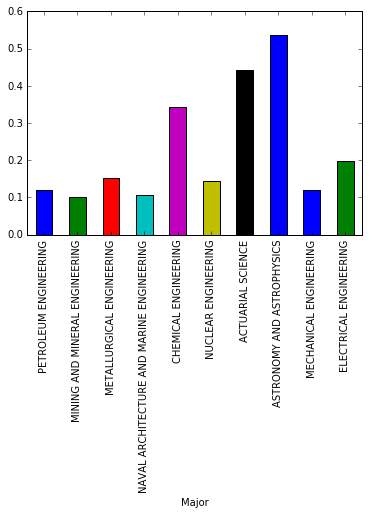

In [29]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)

Astronomy, Acturial Science and Chemical Engineering has the most number of women in the listed majors while Mining, Naval Architecture, Mettalurgical and Petroleum Engineering has the least.

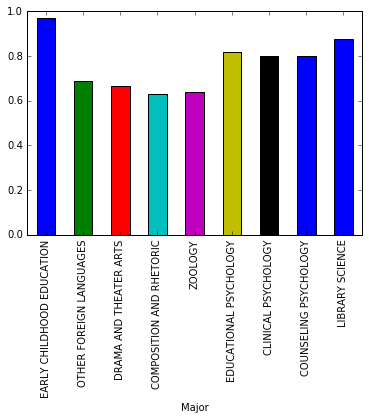

In [39]:
recent_grads[163:].plot.bar(x = 'Major', y = 'ShareWomen', legend = False)

From last 10 major in the Dataframe, Early Education, Library Science ad Educational Psychology has the highest number of women.
Overall these majors have consistent higher number of women than the first 10 majors which where mostly engineering related.

#### Using Bar plots to compare unemployment rate

Using bar plots to compare the unemployment rate from the first 10 rows and last ten rows of dataframe.

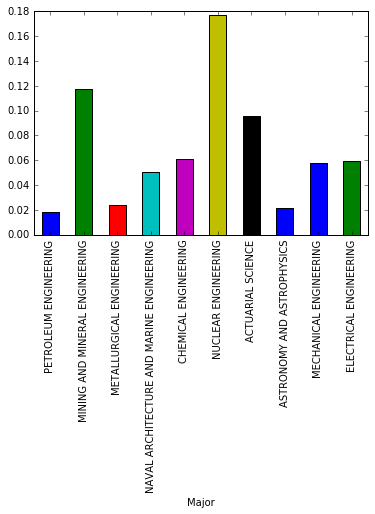

In [33]:
recent_grads[0:10].plot.bar(x = 'Major', y = 'Unemployment_rate',\
                                  legend = False)

Nuclear Engineering, Acturial Science and Mining have the highest unemployment rate. Whereas, Astronomy, Mettalurgical and Petroleum Engineering has the lowest.


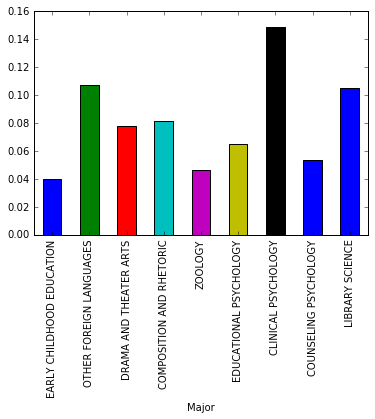

In [37]:
recent_grads[163:z].plot.bar(x = 'Major', y = 'Unemployment_rate',\
                                  legend = False)

Clinical Psychology, Library Science and Foreign languages have the highest number of unemployment. Early Childhood education, zoology and Counselling psychology have the lowest number of unemployment.